In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale=2)
pd.set_option('display.max_rows', None)
from sklearn.datasets import make_blobs
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import plotly.express as px
from sklearn.cluster import KMeans


In [2]:
bp= pd.read_excel(r'./../data/20220426/bp_20220426.xlsx')
for i, (ID, subdf) in enumerate(bp.groupby('patientID'), 1):
    locals()[f'bp{ID}'] = subdf

In [3]:
user = pd.read_excel(r'C:/Users/User/Documents/GitHub/ClinicalAIDSS/Hypertension/user_cleaned.xlsx')


1	14042	431<br>
2	14487	301<br>
3	14536	259<br>
4	14593	253<br>
5	14432	249<br>
6	14549	191<br>
6	14442	148<br>
7	14506	130<br>
8	14488	114<br>
9	14582	110<br>
10	14448	106


Focus on one patient 14042

In [4]:
bp14042

,patientID,systolic,diastolic,pulse,recordTime,notes,deviceID,unit
3630,14042,120,77,86,2021-10-01 15:50:16,after lunch,B3 BT,mmHg
3639,14042,129,75,77,2021-09-27 14:16:14,after lunch,B3 BT,mmHg
3640,14042,114,78,86,2021-09-27 14:05:08,NaN,B3 BT,mmHg
3641,14042,114,78,86,2021-09-27 14:05:08,NaN,B3 BT,mmHg
3642,14042,114,78,86,2021-09-27 14:02:29,NaN,B3 BT,mmHg
3643,14042,118,78,79,2021-09-27 09:30:17,testing2,B3 BT,mmHg
3644,14042,149,88,102,2021-09-23 12:00:15,testing3,B3 BT,mmHg
3645,14042,139,79,90,2021-09-23 11:15:54,testing2,B3 BT,mmHg
3646,14042,79,66,79,2021-09-23 07:53:57,testing,B3 BT,mmHg
3647,14042,118,81,91,2021-09-16 20:15:14,NaN,manual,mmHg


In [5]:
num = bp14042[['pulse','systolic','diastolic' ]]


<AxesSubplot:>

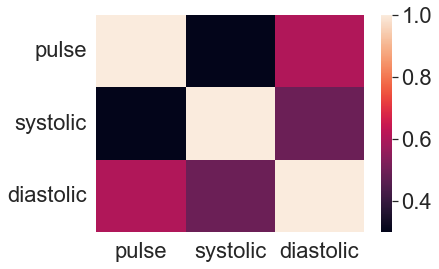

In [6]:
# feature correlation
f_cor = num.corr()
sns.heatmap(f_cor)

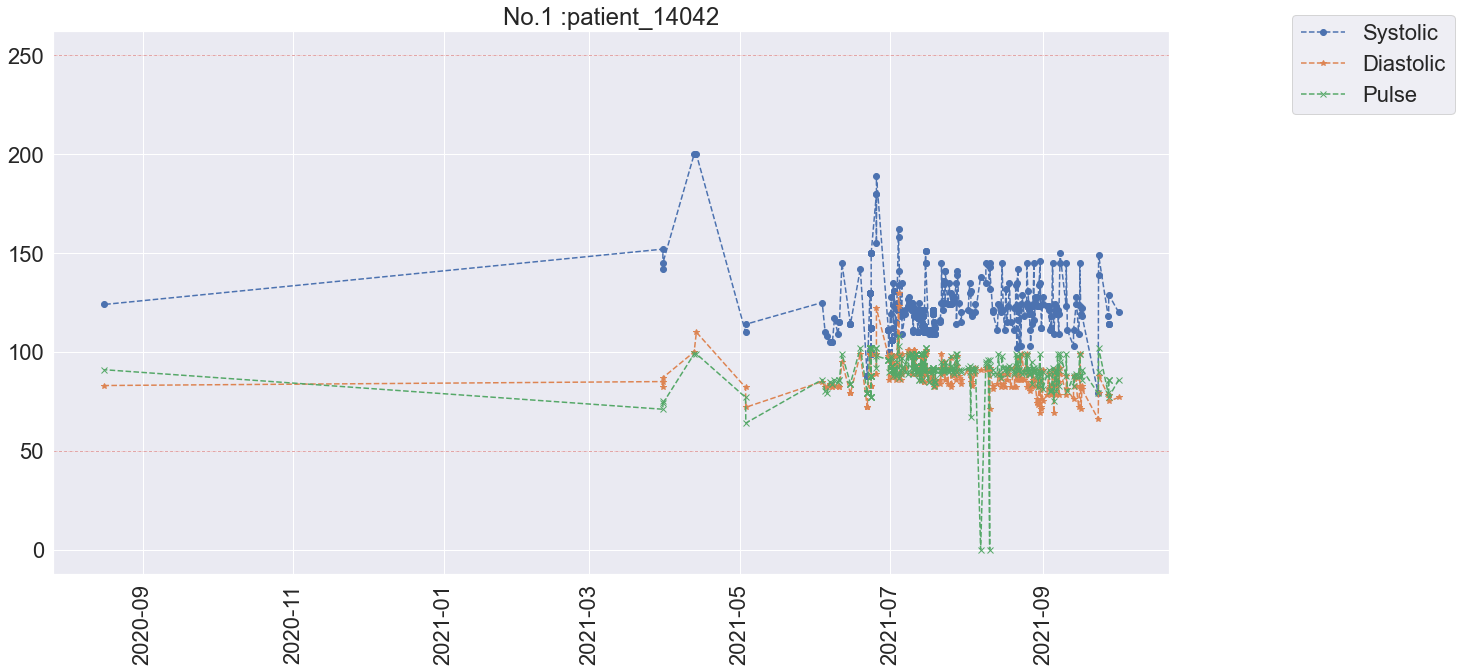

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(bp14042['recordTime'],bp14042['systolic'],linestyle='--', marker='o', label = "Systolic")#title = index)
plt.plot(bp14042['recordTime'],bp14042['diastolic'],linestyle='--', marker='*', label = "Diastolic")
plt.plot(bp14042['recordTime'],bp14042['pulse'],linestyle='--', marker='x',label = "Pulse")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=90)
plt.title('No.1 :patient_14042')
plt.axhline(y = 50, color='r',linestyle='-.', linewidth = 0.5)
plt.axhline(y = 250, color='r',linestyle='-.', linewidth = 0.5)
plt.show()

delete points that are data entry errors


In [8]:
bp14042['systolic'].nlargest(n=10)


4063    200
4064    200
3975    189
3977    180
3978    180
3934    162
3933    158
3976    155
4067    152
3806    151
Name: systolic, dtype: int64

In [9]:
bp14042['systolic'].nsmallest(n=10)


3646    79
4039    88
4040    88
4041    88
4042    88
4043    88
4044    88
3956    98
3957    98
3958    98
Name: systolic, dtype: int64

In [10]:
bp14042['diastolic'].nlargest(n=10)


3933    130
3934    123
3975    122
4063    110
3806    101
3807    101
3808    101
3908    101
3909    101
3910    101
Name: diastolic, dtype: int64

In [11]:
bp14042['diastolic'].nsmallest(n=10)


3646    66
3670    69
3683    69
3649    71
3680    71
3735    71
3652    72
3681    72
4039    72
4040    72
Name: diastolic, dtype: int64

In [12]:
bp14042['pulse'].nlargest(n=10)


3934    108
3933    103
3644    102
3806    102
3807    102
3808    102
3977    102
3978    102
3979    102
3980    102
Name: pulse, dtype: int64

In [37]:
bp14042['pulse'].nsmallest(n=10)


3735     0
3739     0
4061    64
3745    67
4067    71
4065    74
3670    75
4066    75
3639    77
3984    77
Name: pulse, dtype: int64

In [14]:
user.loc[user['patientID']==14042]

,patientID,firstName,lastName,email,gender,birthday,height,height_unit,weight,weight_unit,marital,smoking,race,life_style,Eduction,age
106,14042,NaN,NaN,NaN,Male,1991-05-16,165.0,cm,70.0,kg,Single,No,Bumiputera,1.2,College/university completed,31.0


from the above codes we can see that  pulse has 0 (use 220- age to determine highest pulse rate if needed)

In [15]:
highest_pulse =220-user.loc[user['patientID']==14042,'age']
print(highest_pulse)

106    189.0
Name: age, dtype: float64


SInce the other columns still might have valuable information, fill in the values with NA instead of removing them? but isolation forest doesnt allow that so remove rows 

removing 0 values

In [16]:
#bp14042[['pulse']] = bp14042[['pulse']].replace({'0':np.nan, 0:np.nan})


removing one value from systolic

In [17]:
#bp.loc[bp['systolic']>250,'systolic']=np.nan

In [18]:
#bp.loc[bp['pulse']>189,'pulse']=np.nan

In [19]:
#pulse=bp[['recordTime','pulse']]
#pulse = pulse.dropna()

In [20]:
#bp14042[['pulse']]  = bp14042[['pulse']].dropna

In [21]:
#bp=bp.interpolate('pad')


In [22]:
#bp14042['pulse'].replace(to_replace=0, method='ffill')

3630     86
3639     77
3640     86
3641     86
3642     86
3643     79
3644    102
3645     90
3646     79
3647     91
3648     86
3649     88
3650     99
3651     99
3652     88
3653     88
3654     89
3655     83
3656     88
3657     80
3658     99
3659     88
3660     99
3661     95
3662     91
3663     83
3664     99
3665     80
3666     91
3667     86
3668     90
3669     90
3670     75
3671     92
3672     81
3673     80
3674     80
3675     89
3676     91
3677     88
3678     81
3679     90
3680     86
3681     83
3682     90
3683     88
3684     99
3685     91
3686     82
3687     89
3688     88
3689     90
3690     91
3691     91
3692     92
3693     92
3694     90
3695     84
3696     95
3697     89
3698     89
3699     89
3700     92
3701     90
3702     98
3703     90
3704     99
3705     90
3706     89
3707     90
3708     99
3709     91
3710     91
3711     93
3712     98
3713     98
3714     91
3715     99
3716     93
3717     89
3718     90
3719     92
3720     93
3721

In [38]:
bp14042=bp14042.mask(bp14042==0).fillna(bp14042.mean())


C:\Users\User\AppData\Local\Temp\ipykernel_4072\3169458278.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\User\AppData\Local\Temp\ipykernel_4072\3169458278.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [100]:
model =  IsolationForest(contamination=0.04)
model.fit(bp14042[['pulse']])



C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.04)

In [101]:
bp14042['pulse_outliers']=pd.Series(model.predict(bp[['pulse']])).apply(lambda x: 'yes' if (x == -1) else 'no' )
bp14042.query('pulse_outliers=="yes"')


C:\Users\User\AppData\Local\Temp\ipykernel_4072\2294152527.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,systolic,diastolic,pulse,recordTime,pulse_outliers
3639,129,75,77.00000,2021-09-27 14:16:14,yes
3670,109,69,75.00000,2021-09-05 08:30:00,yes
3672,112,80,81.00000,2021-09-04 09:23:00,yes
3678,124,75,81.00000,2021-08-31 20:03:00,yes
3686,123,73,82.00000,2021-08-29 20:30:00,yes
3735,132,71,92.12993,2021-08-10 08:01:27,yes
3739,138,91,92.12993,2021-08-06 16:06:44,yes
3745,131,87,67.00000,2021-08-02 16:17:23,yes
3933,158,130,103.00000,2021-07-04 09:20:49,yes
3934,162,123,108.00000,2021-07-04 09:20:03,yes


In [102]:
fig = px.scatter(bp14042.reset_index(), x='recordTime', y='pulse', color='pulse_outliers', title='')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [103]:
model.fit(bp14042[['systolic']])


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.04)

In [104]:
bp14042['systolic_outliers']=pd.Series(model.predict(bp14042[['systolic']])).apply(lambda x: 'yes' if (x == -1) else 'no' )
bp14042.query('systolic_outliers=="yes"')


C:\Users\User\AppData\Local\Temp\ipykernel_4072\1541846998.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,systolic,diastolic,pulse,recordTime,pulse_outliers,systolic_outliers


In [105]:
fig = px.scatter(bp14042.reset_index(), x='recordTime', y='systolic',
                 #color='systolic_outliers', 
                 title='')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [55]:
model.fit(bp14042[['diastolic']])


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.05)

In [56]:
bp14042['diastolic_outliers']=pd.Series(model.predict(bp14042[['diastolic']])).apply(lambda x: 'yes' if (x == -1) else 'no' )
bp14042.query('diastolic_outliers=="yes"')


,patientID,systolic,diastolic,pulse,recordTime,notes,deviceID,unit,pulse_outliers,systolic_outliers,diastolic_outliers


In [60]:
fig = px.scatter(bp14042.reset_index(), x='recordTime', y='diastolic',
                 #color='diastolic_outliers', 
                 title='')
fig.update_xaxes(
   rangeslider_visible=True,
) 
fig.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



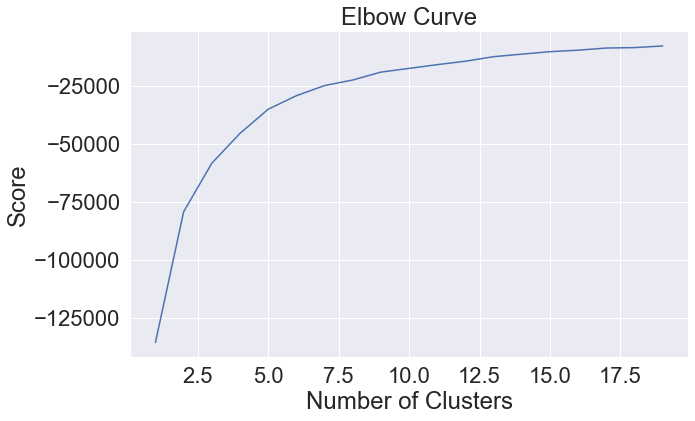

In [61]:
data = bp14042[['pulse','systolic','diastolic']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [77]:
df = bp14042[['systolic','diastolic','pulse','recordTime']]


In [78]:
df

,systolic,diastolic,pulse,recordTime
3630,120,77,86.00000,2021-10-01 15:50:16
3639,129,75,77.00000,2021-09-27 14:16:14
3640,114,78,86.00000,2021-09-27 14:05:08
3641,114,78,86.00000,2021-09-27 14:05:08
3642,114,78,86.00000,2021-09-27 14:02:29
3643,118,78,79.00000,2021-09-27 09:30:17
3644,149,88,102.00000,2021-09-23 12:00:15
3645,139,79,90.00000,2021-09-23 11:15:54
3646,79,66,79.00000,2021-09-23 07:53:57
3647,118,81,91.00000,2021-09-16 20:15:14


http://amid.fish/anomaly-detection-with-k-means-clustering

https://github.com/mrahtz/sanger-machine-learning-workshop/blob/master/learn_utils.py

In [106]:
segment_len = 12
slide_len = 2

segments = []
for start_pos in range(0, len(bp14042), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(bp14042[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))

Produced 210 waveform segments


In [107]:
segment

array([[124, 83, 91.0, Timestamp('2020-08-16 08:14:00'), 'no', nan]],
      dtype=object)

In [108]:
def sliding_chunker(data, window_len, slide_len):
    """
    Split a list into a series of sub-lists, each sub-list window_len long,
    sliding along by slide_len each time. If the list doesn't have enough
    elements for the final sub-list to be window_len long, the remaining data
    will be dropped.
    e.g. sliding_chunker(range(6), window_len=3, slide_len=2)
    gives [ [0, 1, 2], [2, 3, 4] ]
    """
    chunks = []
    for pos in range(0, len(data), slide_len):
        chunk = np.copy(data[pos:pos+window_len])
        if len(chunk) != window_len:
            continue
        chunks.append(chunk)

    return chunks

def plot_waves(waves, step):
    """
    Plot a set of 9 waves from the given set, starting from the first one
    and increasing in index by 'step' for each subsequent graph
    """
    plt.figure()
    n_graph_rows = 3
    n_graph_cols = 3
    graph_n = 1
    wave_n = 0
    for _ in range(n_graph_rows):
        for _ in range(n_graph_cols):
            axes = plt.subplot(n_graph_rows, n_graph_cols, graph_n)
            axes.set_ylim([-100, 150])
            plt.plot(waves[wave_n])
            graph_n += 1
            wave_n += step
    # fix subplot sizes so that everything fits
    plt.tight_layout()
    plt.show()

def reconstruct(data, window, clusterer):
    """
    Reconstruct the given data using the cluster centers from the given
    clusterer.
    """
    window_len = len(window)
    slide_len = window_len/2
    segments = sliding_chunker(data, window_len, slide_len)
    reconstructed_data = np.zeros(len(data))
    for segment_n, segment in enumerate(segments):
        # window the segment so that we can find it in our clusters which were
        # formed from windowed data
        segment *= window
        nearest_match_idx = clusterer.predict(segment)[0]
        nearest_match = np.copy(clusterer.cluster_centers_[nearest_match_idx])

        pos = segment_n * slide_len
        reconstructed_data[pos:pos+window_len] += nearest_match

    return reconstructed_data

ConversionError: Failed to convert value(s) to axis units: array(['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no'], dtype=object)

<Figure size 2160x720 with 0 Axes>

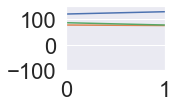

In [110]:
plt.figure(figsize=(30, 10))
plot_waves(segments, step=3)

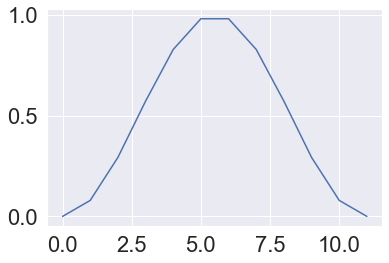

In [111]:
window_rads = np.linspace(0, np.pi, segment_len)
window = np.sin(window_rads)**2
plt.plot(window)
plt.show()

In [112]:
window_rads = np.linspace(0, np.pi, segment_len)
window = np.sin(window_rads)**2
windowed_segments = []
for segment in segments:
    windowed_segment = np.copy(segment) * window
    windowed_segments.append(windowed_segment)

ValueError: operands could not be broadcast together with shapes (12,6) (12,) 

IndexError: list index out of range

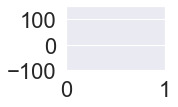

In [113]:
plot_waves(windowed_segments, step=3)
